In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 시장금리 데이터 불러오기
df_new_spread = pd.read_csv('new_data/시장금리(1995.5월부터).csv')

In [3]:
# 데이터 전처리 (행/열 변환)
# '계정항목'이 '국고채(3년)'과 '회사채(3년, AA-)'인 행을 찾음
treasury_row = df_new_spread[df_new_spread['계정항목'] == '국고채(3년)']
company_row = df_new_spread[df_new_spread['계정항목'] == '회사채(3년, AA-)']

In [4]:
# 날짜 컬럼들만 추출
date_cols = df_new_spread.columns[4:]

In [5]:
# 새로운 DataFrame 생성
df = pd.DataFrame({
    'Treasury': treasury_row.iloc[0][date_cols].values,
    'Company': company_row.iloc[0][date_cols].values
}, index=date_cols)

In [6]:
# 인덱스를 날짜 형식으로 변환 및 정렬
df.index.name = '날짜'
df.index = pd.to_datetime(df.index, format='%Y/%m')
df = df.sort_index()

In [7]:
# 날짜 범위 설정 (2004년 1월 1일부터 2026년 2월 1일까지)
df = df[(df.index >= '2004-01-01') & (df.index <= '2026-02-01')]
df = df.astype(float)

In [8]:
# 데이터 타입 변환 (문자열 -> 숫자)
df['Treasury'] = pd.to_numeric(df['Treasury'])
df['Company'] = pd.to_numeric(df['Company'])

In [9]:
# 신용스프레드 계산
# 공식: 회사채금리 - 국고채금리
df['Credit_Spread'] = df['Company'] - df['Treasury']

In [10]:
# 12개월 변화량 계산
# 금리는 로그 수익률보다 단순 등락폭(bp)을 주로 사용합니다.
df['12M_Change'] = df['Credit_Spread'].diff(12)

In [11]:
# Z-Score 계산
mean_val = df['12M_Change'].mean()
std_val = df['12M_Change'].std()

In [12]:
# 부호 반전 적용
df['Z_score'] = -1 * ((df['12M_Change'] - mean_val) / std_val)

In [13]:
# 결과 확인
print(df[['Credit_Spread', '12M_Change', 'Z_score']].tail())

            Credit_Spread  12M_Change   Z_score
날짜                                             
2025-09-01          0.462      -0.118  0.173283
2025-10-01          0.427      -0.148  0.219349
2025-11-01          0.419      -0.151  0.223955
2025-12-01          0.492      -0.154  0.228562
2026-01-01          0.501      -0.157  0.233169


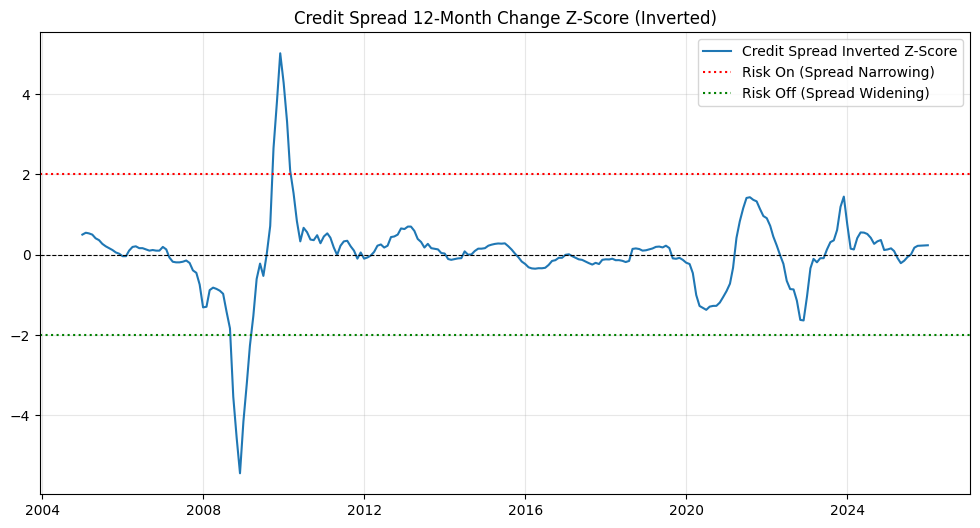

In [14]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Z_score'], label='Credit Spread Inverted Z-Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(2, color='red', linestyle=':', label='Risk On (Spread Narrowing)')
plt.axhline(-2, color='green', linestyle=':', label='Risk Off (Spread Widening)')
plt.title('Credit Spread 12-Month Change Z-Score (Inverted)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# CSV 파일 저장
output_filename = 'new_data/new_data_z_score/Credit_Spread_Z_Score.csv'
df.to_csv(output_filename, encoding='utf-8-sig')
print(f"'{output_filename}' 파일이 저장되었습니다.")

'new_data/new_data_z_score/Credit_Spread_Z_Score.csv' 파일이 저장되었습니다.
